<a href="https://colab.research.google.com/github/HumanOP/RAGanot/blob/main/PaAC_RW_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib

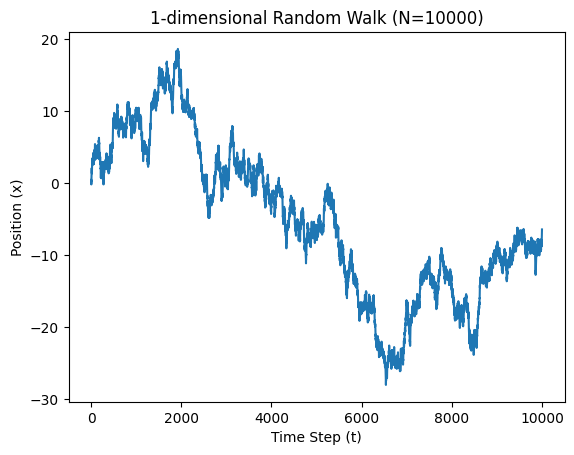

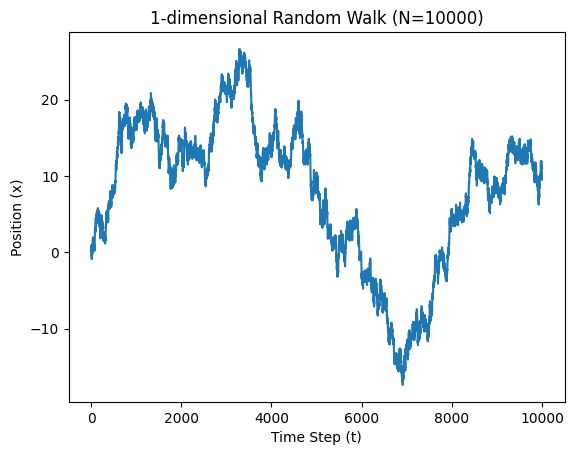

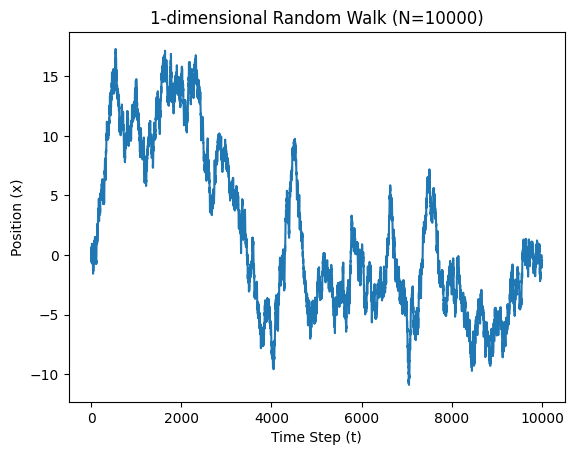

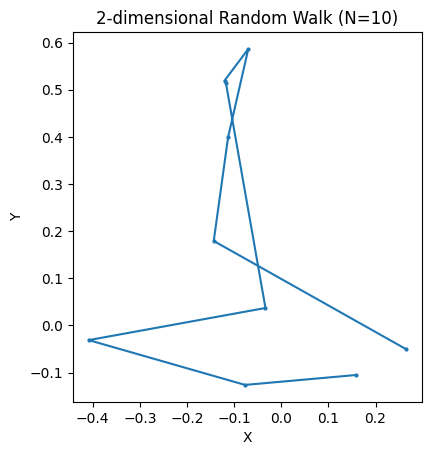

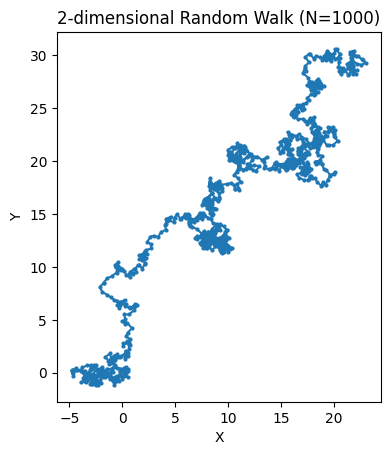

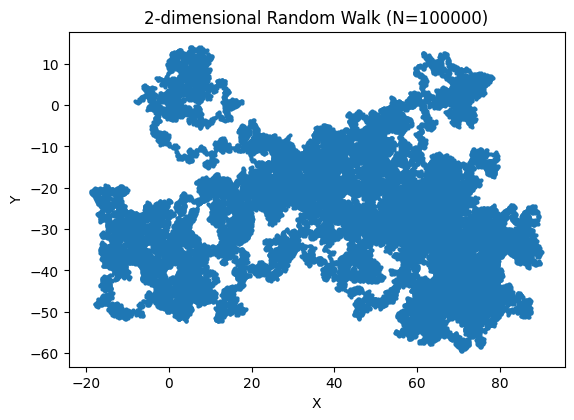

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_walk(d, N, seed):
    np.random.seed(seed)
    steps = np.random.uniform(-0.5, 0.5, size=(N, d))
    walk = np.cumsum(steps, axis=0)
    return walk

def plot_random_walk(walk, d, N):
    if d == 1:
        plt.plot(np.arange(N), walk)
        plt.xlabel('Time Step (t)')
        plt.ylabel('Position (x)')
        plt.title(f'{d}-dimensional Random Walk (N={N})')
        plt.show()
    elif d == 2:
        plt.plot(walk[:, 0], walk[:, 1], marker='o', linestyle='-', markersize=2)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'{d}-dimensional Random Walk (N={N})')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

# (i) Random walk in 1 dimension
d = 1
N_values = [10000, 10000, 10000]  # Number of steps for each realization
for i in range(3):
    seed = np.random.randint(1, 1000)  # Use a different seed for each realization
    random_walk = generate_random_walk(d, N_values[i], seed)
    plot_random_walk(random_walk, d, N_values[i])

# (ii) Random walk in 2 dimensions
d = 2
N_values = [10, 1000, 100000]  # Number of steps for each realization
for N in N_values:
    seed = np.random.randint(1, 1000)  # Use a different seed for each realization
    random_walk = generate_random_walk(d, N, seed)
    plot_random_walk(random_walk, d, N)

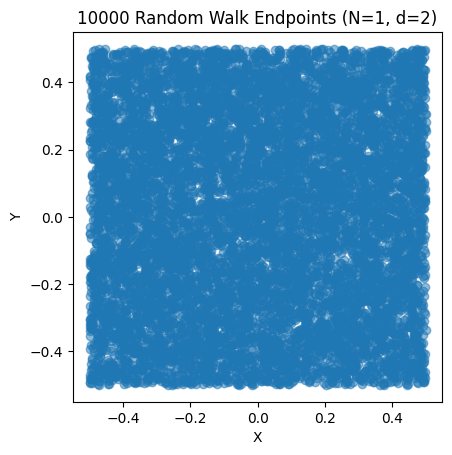

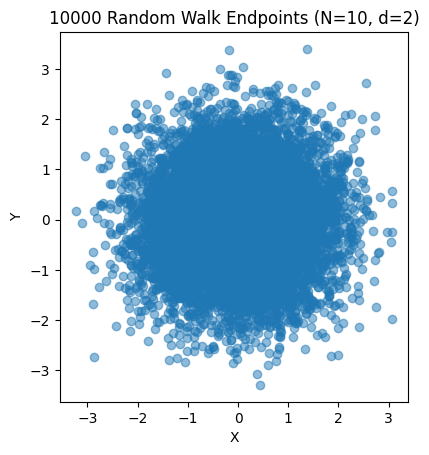

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_endpoints(W, N, d):
    endpoints = np.zeros((W, d))
    for i in range(W):
        random_walk = np.random.uniform(-0.5, 0.5, size=(N, d))
        endpoints[i] = np.sum(random_walk, axis=0)
    return endpoints

def scatter_plot_endpoints(endpoints, title):
    plt.scatter(endpoints[:, 0], endpoints[:, 1], marker='o', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Parameters
W = 10000
N_values = [1, 10]
d = 2

# Generate and plot endpoints for different N values
for N in N_values:
    endpoints = generate_endpoints(W, N, d)
    title = f'{W} Random Walk Endpoints (N={N}, d={d})'
    scatter_plot_endpoints(endpoints, title)

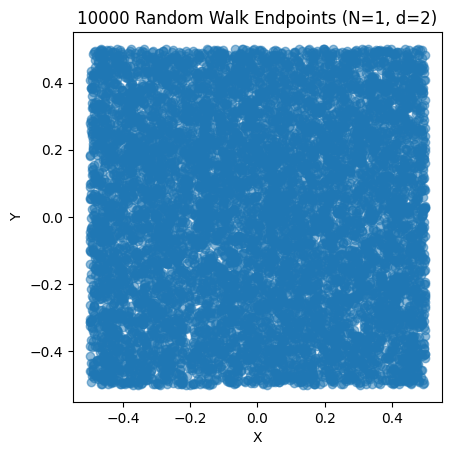

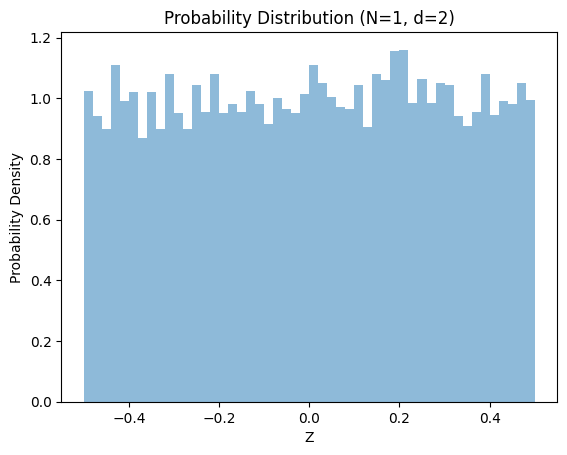

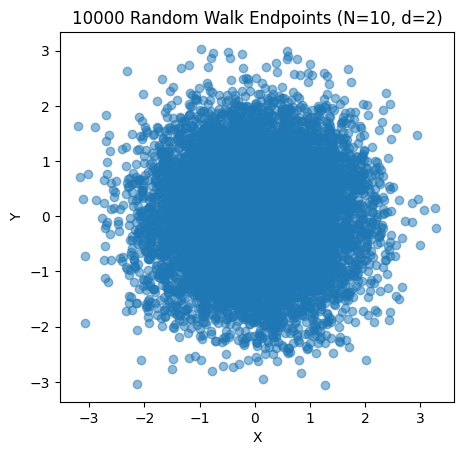

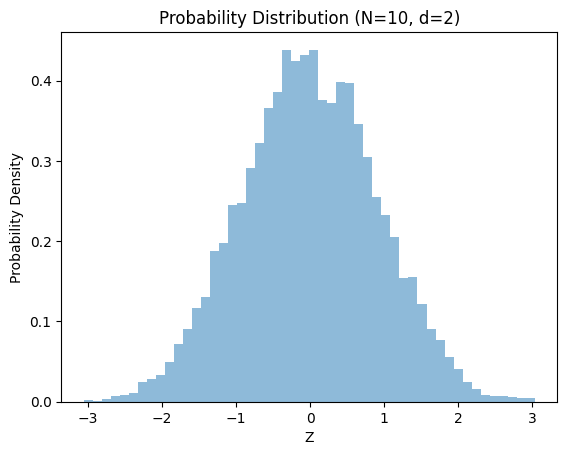

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_endpoints(W, N, d):
    endpoints = np.zeros((W, d))
    for i in range(W):
        random_walk = np.random.uniform(-0.5, 0.5, size=(N, d))
        endpoints[i] = np.sum(random_walk, axis=0)
    return endpoints

def scatter_plot_endpoints(endpoints, title):
    plt.scatter(endpoints[:, 0], endpoints[:, 1], marker='o', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def plot_probability_distribution(positions, title):
    plt.hist(positions, bins=50, density=True, alpha=0.5)
    plt.xlabel('Z')
    plt.ylabel('Probability Density')
    plt.title(title)
    plt.show()

# Parameters
W = 10000
N_values = [1, 10]
d = 2

# Generate and plot endpoints for different N values
for N in N_values:
    endpoints = generate_endpoints(W, N, d)
    title_endpoints = f'{W} Random Walk Endpoints (N={N}, d={d})'
    scatter_plot_endpoints(endpoints, title_endpoints)

    # Extract z-axis positions
    z_positions = endpoints[:, -1]

    # Plot probability distribution along the z-axis
    title_distribution = f'Probability Distribution (N={N}, d={d})'
    plot_probability_distribution(z_positions, title_distribution)

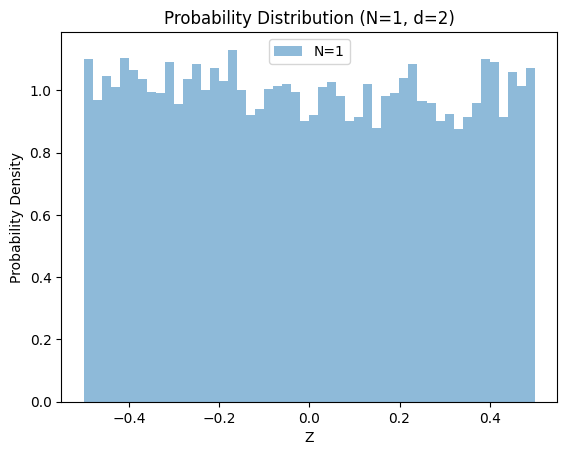

Standard Deviation (N=1): 0.291144948306757


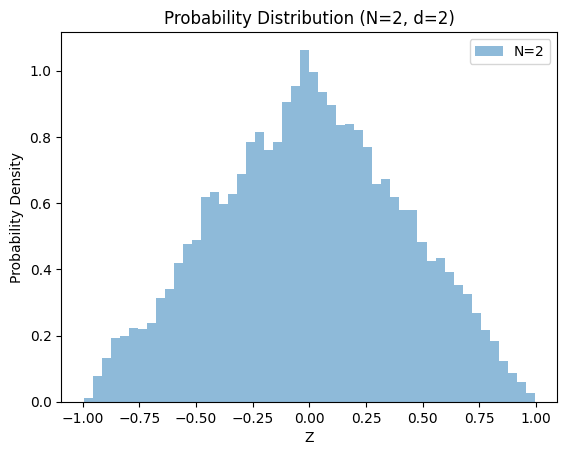

Standard Deviation (N=2): 0.4066470402086884


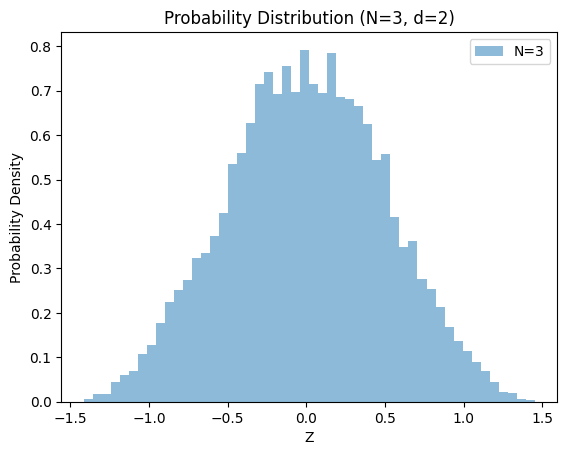

Standard Deviation (N=3): 0.4971854254882918


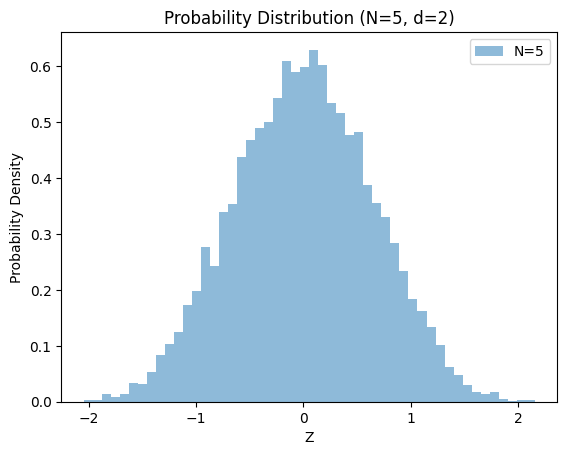

Standard Deviation (N=5): 0.6412277774253109


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_endpoints(W, N, d):
    endpoints = np.zeros((W, d))
    for i in range(W):
        random_walk = np.random.uniform(-0.5, 0.5, size=(N, d))
        endpoints[i] = np.sum(random_walk, axis=0)
    return endpoints

def plot_histogram(positions, N, title):
    plt.hist(positions, bins=50, density=True, alpha=0.5, label=f'N={N}')
    plt.xlabel('Z')
    plt.ylabel('Probability Density')
    plt.title(title)
    plt.legend()
    plt.show()

def calculate_std_dev(positions, N):
    std_dev = np.std(positions)
    print(f'Standard Deviation (N={N}): {std_dev}')


# Parameters
W = 10000
N_values = [1, 2, 3, 5]
d = 2
# Generate and plot histograms for different N values
for N in N_values:
    endpoints = generate_endpoints(W, N, d)
    title = f'Probability Distribution (N={N}, d={d})'
    z_positions = endpoints[:, -1]
    plot_histogram(z_positions, N, title)

     # Calculate and print standard deviation
    calculate_std_dev(z_positions, N)

RMS step-size (a) = standard deviation * (square-root of N)